# Types of variables Lab


### Data comes from many sources: sensor measurements, events, text, images, and videos. The Internet of Things (IoT) is spewing out streams of information. Much of this data is unstructured: images are a collection of pixels with each pixel containing RGB (red, green, blue) color information.
### Texts are sequences of words and nonword characters, often organized by sections, subsections, and so on. Clickstreams are sequences of actions by a user interacting with an app or web page. In fact, a major challenge of data science is to harness this torrent of raw data into actionable information.


# 1. Let's load some libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2. Let's load some datasets

### In the covid19_cases.csv file, we have an export from the daily number of new reported cases of COVID-19 by country worldwide dataset provided by the European Centre for Disease Prevention and Control (ECDC), which can be found at https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide.
### For scripted or automated collection of this data, the ECDC makes the current day's CSV file available via https://opendata.ecdc.europa.eu/covid19/casedistribution/csv.
### The snapshot we will be using was collected on September 19, 2020 and contains the number of new COVID-19 cases per country from December 31, 2019 through September 18, 2020, with partial data for September 19, 2020. For this lab, we will look at the 8-month span from January 18, 2020 through September 18, 2020.


In [2]:
covidDataFrame = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/Maths4DS101/main/data/covid19_cases.csv',parse_dates=['dateRep'])

In [3]:

covidDataFrame.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2,2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
3,2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
4,2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


In [4]:
covidDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43718 entries, 0 to 43717
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     43718 non-null  datetime64[ns]
 1   day                                                         43718 non-null  int64         
 2   month                                                       43718 non-null  int64         
 3   year                                                        43718 non-null  int64         
 4   cases                                                       43718 non-null  int64         
 5   deaths                                                      43718 non-null  int64         
 6   countriesAndTerritories                                     43718 non-null  object        
 7   geoId                 

## 3. Continuous variables

### Continous data can take any real value within a range (e.g. from zero to 100, from zero to infinity, etc)
### From a practical standpoint a variable that can take more than a hundred values can be considered continuous.
### In our COVID-19 dataset the columns: "cases", "deaths", "popData2019" and "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000" are instances of continuous data.

In [5]:
covidDataFrame[['cases','deaths','popData2019','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,47,1,38041757.0,1.616645
1,0,0,38041757.0,1.535155
2,17,0,38041757.0,1.653446
3,40,10,38041757.0,1.708649
4,99,6,38041757.0,1.627159
...,...,...,...,...
43713,0,0,14645473.0,NaN
43714,0,1,14645473.0,NaN
43715,0,0,14645473.0,NaN
43716,1,0,14645473.0,NaN


### All the previous variables can take any value within a given range. For instance cases range from 0 to 97894. Deaths range from 0 to 4928, etc.

In [7]:
covidDataFrame[['cases','deaths','popData2019','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']].describe()

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,43718.000000,43718.000000,4.365400e+04,40937.000000
mean,698.578297,21.792488,4.287054e+07,33.001167
std,4352.355124,126.490919,1.578720e+08,76.067751
min,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,0.000000,0.000000,1.355982e+06,0.370634
50%,9.000000,0.000000,8.082359e+06,4.571738
75%,150.000000,3.000000,2.916192e+07,26.575105
max,97894.000000,4928.000000,1.433784e+09,1058.225943


## 4. Time-series variables

### Time series variables are continuous variables observed across time.
### They are oftentimes considered a different category as they require their own specific mathematical techniques.

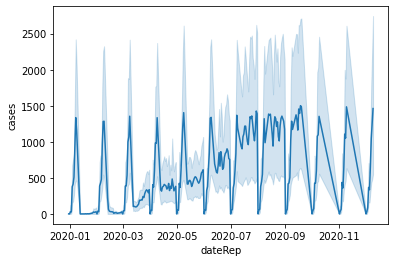

In [17]:
sns.lineplot(x="dateRep", y="cases",data=covidDataFrame)

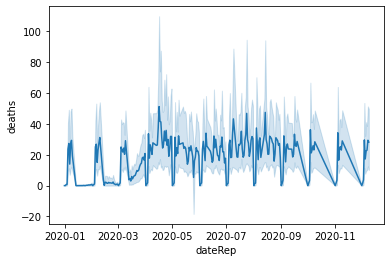

In [18]:
sns.lineplot(x="dateRep", y="deaths",data=covidDataFrame)

## 4. Categorical variables

### Categorical variables are discrete variables that can take on only a specific set of values representing a set of possible categories (e.g. [yes, no], [male,female], [white, brown, yellow],[France, Germany,Spain, UK])
### In our COVID-19 dataset the variables: 'countriesAndTerritories' and 'continentExp' are instances of categorical variables.

In [20]:
covidDataFrame[['countriesAndTerritories', 'geoId', 'countryterritoryCode','continentExp']]

,countriesAndTerritories,geoId,countryterritoryCode,continentExp
0,Afghanistan,AF,AFG,Asia
1,Afghanistan,AF,AFG,Asia
2,Afghanistan,AF,AFG,Asia
3,Afghanistan,AF,AFG,Asia
4,Afghanistan,AF,AFG,Asia
...,...,...,...,...
43713,Zimbabwe,ZW,ZWE,Africa
43714,Zimbabwe,ZW,ZWE,Africa
43715,Zimbabwe,ZW,ZWE,Africa
43716,Zimbabwe,ZW,ZWE,Africa
